In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sea_data = 'Data/Seattle/'
bos_data = 'Data/Boston/'

### 1. Data
By reading in the data, we can see that the total numbers of listings in these two cities are similar, Seattle has 3818 listings, while Boston has 3585. 
<br>
<br>
Seattle and Boston each have three datasets: 
- Calendar: Contains the listing_id, date and price
- listings: Includes all the details of the host, service, the house/room characteristics and summary statistics of reviews, etc.
- reviews: Listing id, reviewer id and detailed reviews. 

In [18]:
sea_calendar = pd.read_csv(sea_data + 'calendar.csv')
sea_listings = pd.read_csv(sea_data + 'listings.csv')
sea_reviews = pd.read_csv(sea_data + 'reviews.csv')
bos_calendar = pd.read_csv(bos_data + 'calendar.csv')
bos_listings = pd.read_csv(bos_data + 'listings.csv')
bos_reviews = pd.read_csv(bos_data + 'reviews.csv')

In [29]:
sea_listings.shape

(3818, 92)

In [30]:
bos_listings.shape

(3585, 95)

In [19]:
sea_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
sea_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [109]:
# transform price to numeric
sea_listings['price'] = sea_listings.price.str.replace('$','')
sea_listings['price'] = sea_listings.price.str.replace(',','')
sea_listings['price'] = pd.to_numeric(sea_listings['price'])

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [21]:
sea_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [22]:
bos_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [23]:
bos_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [184]:
# transform price to numeric
bos_listings['price'] = bos_listings.price.str.replace('$','')
bos_listings['price'] = bos_listings.price.str.replace(',','')
bos_listings['price'] = pd.to_numeric(bos_listings['price'])

In [37]:
# Check if the ids in bos_listings are unique
bos_listings['id'].nunique() == len(bos_listings)

True

In [24]:
bos_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


#### Data Cleaning
Listing availability in a year

In [55]:
# Merge listings with calendar
sea_listing_available = pd.merge(sea_listings[['id', 'name']],
                                 sea_calendar,
                                 left_on = 'id', 
                                 right_on = 'listing_id',
                                 how = 'right')

In [56]:
# Convert data format
sea_listing_available['date'] = pd.to_datetime(sea_listing_available['date'])
sea_listing_available['available'] = np.where(sea_listing_available['available'] == 't', True, False)

# Then check data format
sea_listing_available.dtypes

id                     int64
name                  object
listing_id             int64
date          datetime64[ns]
available               bool
price                 object
dtype: object

In [70]:
# group by availability on each day and count
sea_available_sum = pd.DataFrame(sea_listing_available.groupby(['id','available'])['listing_id'].\
                                 agg('count')).reset_index()

# rename column names
sea_available_sum.rename(columns = {'id':'id', 'available':'available','listing_id':'Count'}, \
                         inplace = True)
sea_available_sum.head()

,id,available,Count
0,3335,False,56
1,3335,True,309
2,4291,True,365
3,5682,False,56
4,5682,True,309


In [87]:
# Filter only the available days
sea_available_pct = sea_available_sum[sea_available_sum['available']==True].copy()

# Calculate percentage of occupied/unavailable in a 
sea_available_pct['available_pct'] = np.round(sea_available_pct['Count']/365, decimals = 3)

In [96]:
sea_available_pct.head()

,id,available,Count,available_pct
1,3335,True,309,0.847
2,4291,True,365,1.000
4,5682,True,309,0.847
5,6606,True,365,1.000
7,7369,True,53,0.145


#### Price Distribution
Looking at all the listing prices, compare the mean, mode and range of values

In [172]:
import matplotlib.style as style 
import matplotlib as mpl
# style.available[:5]    # A list of styles to choose from

Text(-126.074,700,'mean: 173.9')

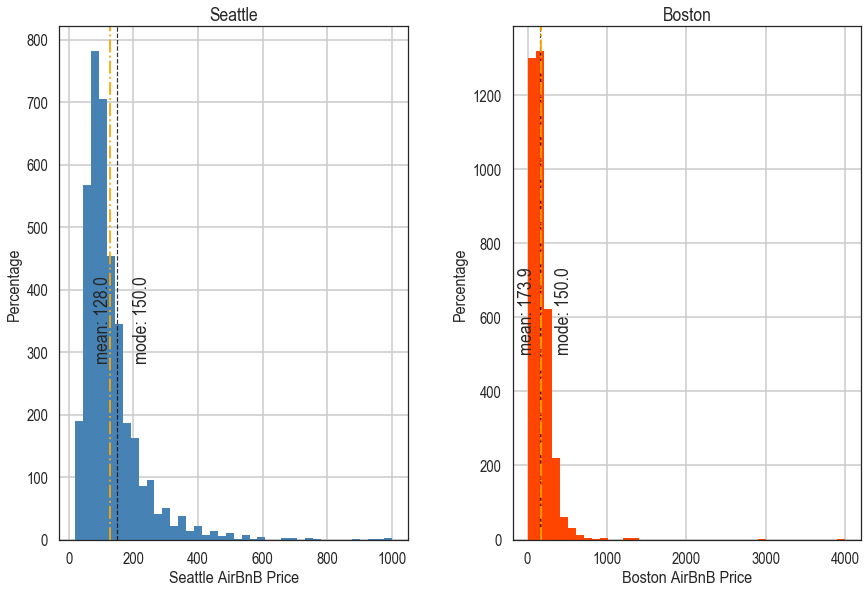

In [233]:
sns.set_style("white")
# Could be usefule reset axes styles
# sns.axes_style()
mpl.rcParams['font.family'] = "arial narrow"
style.use('seaborn-poster')

fig, axes = plt.subplots(1, 2)

sea_listings.hist('price', bins=40, ax=axes[0], color = 'steelblue')
bos_listings.hist('price', bins=40, ax=axes[1], color = 'orangered')

# Add xlabels
axes[0].set(xlabel='Seattle AirBnB Price', ylabel='Percentage')
axes[1].set(xlabel='Boston AirBnB Price', ylabel='Percentage')

# Set tittle
axes[0].set_title('Seattle')
axes[1].set_title('Boston')

# Add mode
axes[0].axvline(sea_listings['price'].mode()[0], color='black', linestyle='--', alpha = 0.8, lw = 1.2)
axes[0].text(sea_listings['price'].mode()[0] + 50,400,'mode: ' + str(sea_listings['price'].mode()[0]),rotation=90)
axes[1].axvline(bos_listings['price'].mode()[0], color='black', linestyle='--', alpha = 0.8, lw = 1.2)
axes[1].text(bos_listings['price'].mode()[0] + 200,700,'mode: ' + str(bos_listings['price'].mode()[0]),rotation=90)

# Add mean
axes[0].axvline(sea_listings['price'].mean(), color='orange', linestyle='-.', alpha = 0.9, lw = 2)
axes[0].text(sea_listings['price'].mean() - 50,400,'mean: ' + str(np.round(sea_listings['price'].mean(),1)),rotation=90)
axes[1].axvline(bos_listings['price'].mean(), color='orange', linestyle='-.', alpha = 0.9, lw = 2)
axes[1].text(bos_listings['price'].mean() - 300,700,'mean: ' + str(np.round(bos_listings['price'].mean(),1)),rotation=90)

#### Price Prediction
What are the most powerful predictors for each city?

In [262]:
# Categorical/numeric columns for Seattle
cat_vars = sea_listings.select_dtypes(include = ['object']).columns
num_vars = sea_listings.select_dtypes(include = ['float','int']).columns

In [288]:
# select the useful columns and examine if further data cleaning is needed
cat_vars_select = ['transit', 'amenities', # transform to transit type
                   'host_verifications', # transform to number of verifications
                   'host_since', 'host_response_time', 'first_review', 'last_review', # time vars
                   'security_deposit', 'cleaning_fee', 'extra_people', # convert str with $ to float 
                    
                   # variables ready to go
                   'host_neighbourhood', 'neighbourhood', 'host_acceptance_rate', 'host_response_rate',
                   'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'bed_type','cancellation_policy', 

                   # boolean
                   'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
                   'requires_license', 'is_location_exact', 
                   'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

num_vars_select = ['host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 
                   'bedrooms', 'beds', 'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights', 
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                   'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                   'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']

In [289]:
cat_var_df = sea_listings[cat_vars_select]
num_vars_select = sea_listings[num_vars_select]

In [383]:
# money vars: convert string to float
money_vars = ['security_deposit', 'cleaning_fee', 'extra_people']
money_vars_df = cat_var_df[money_vars]

# lambda function to remove '$',',' in dataframe
money_vars_df = money_vars_df[money_vars].apply(lambda col: col.replace({'\$':'',',':''}, regex = True).astype(float), axis = 0)

In [354]:
# time vars: convert string to date then number of days
time_vars = ['host_since', 'first_review', 'last_review']
time_vars_df = cat_var_df[time_vars]

# Use lambda to avoid the copy error
time_vars_df = time_vars_df[time_vars].apply(lambda col: pd.to_datetime(col), axis = 0)
# time_vars_df['day_'+'host_since'] = (pd.Timestamp.now() - time_vars_df['host_since']).dt.days

# define a function to convert 
def date_to_now(vars, df):
    for column_name in time_vars:
        try:
            df['day_' + column_name] = (pd.Timestamp.now() - df[column_name]).dt.days
        except:
            continue
    return df

day_vars_df = date_to_now(time_vars, time_vars_df)

In [296]:
# boolean vars: convert categorical to boolean
bool_vars = ['host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
             'requires_license', 'is_location_exact', 
             'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

bool_vars_df = cat_var_df[bool_vars].replace({'t': True, 'f': False})

In [312]:
# categorical vars: categorical variables to dummy
categorical_vars = ['host_neighbourhood', 'neighbourhood', 'host_acceptance_rate', 'neighbourhood_cleansed', 'host_response_time',
                    'zipcode', 'property_type', 'room_type', 'bed_type','cancellation_policy','host_response_rate']

categorical_vars_df = cat_var_df[categorical_vars]

In [299]:
dummy_vars_df.head()

,host_neighbourhood,neighbourhood,host_acceptance_rate,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,cancellation_policy
0,Queen Anne,Queen Anne,100%,West Queen Anne,98119,Apartment,Entire home/apt,Real Bed,moderate
1,Queen Anne,Queen Anne,100%,West Queen Anne,98119,Apartment,Entire home/apt,Real Bed,strict
2,Queen Anne,Queen Anne,100%,West Queen Anne,98119,House,Entire home/apt,Real Bed,strict
3,Queen Anne,Queen Anne,NaN,West Queen Anne,98119,Apartment,Entire home/apt,Real Bed,flexible
4,Queen Anne,Queen Anne,NaN,West Queen Anne,98119,House,Entire home/apt,Real Bed,strict


In [291]:
sea_listings['host_has_profile_pic'].unique()

SyntaxError: invalid syntax (<ipython-input-291-3d99f5eb52c4>, line 1)

In [ ]:

# concat the convert categorical dummies to original df
for col in dummy_vars:
    try:
        # for each cat add dummy var, drop original column
        dummy_vars_df = dummy_vars_df.concat([dummy_vars_df.drop(col, axis=1), 
        pd.get_dummies(dummy_vars_df[col], 
                       prefix=col,
                       prefix_sep='_', 
                       drop_first=True,
                       dummy_na=dummy_na)],axis=1)
    except:
        continue

Business questions Comparing AirBnB in Seattle and Boston:
- Is the price keeping increasing?
- Predicting the listing price: Which matters the most? The characteristics of houses or location? 
- How many reviewers are hosts as well?
- How people would like to name their AirBnBs? What are the popular words appeared in the most popular houses?
- Which price range is the most popular generally?

- __Price distribution/ Which neighborhood has the highest price?__
- __Which is more expensive?__
- __What is the most important predictor of the house price?__